In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**1. Buscar un dataset médico en kaggle:
Biclase y Valores perdidos**

Dataset obtenido de Kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

**2. Realizar el análisis del banco, imputar, gráfica, etc**

El dataset obtenido de kaggle contiene informacion acerca de cancer de mama del estado de Wisconsin. La variable objetivo que es Diagnosis con Benigno (B) o Maligno (M) y caracteristicas del tumor como radio, textura, perimetro, concavidad etc.

In [ ]:
df_cancer = pd.read_csv("/content/data_cancer.csv")

In [ ]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,560.000000,569.000000,569.000000,569.000000,560.000000,569.000000,569.000000,566.000000,565.00000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.151343,19.289649,91.969033,654.889104,0.096373,0.104341,0.088799,0.049042,0.18095,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.534622,4.301036,24.298981,351.914129,0.014026,0.052813,0.079720,0.038865,0.02710,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.10600,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.707500,16.170000,75.170000,420.300000,0.086400,0.064920,0.029560,0.020323,0.16190,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.390000,18.840000,86.240000,551.100000,0.095930,0.092630,0.061540,0.033770,0.17920,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.892500,21.800000,104.100000,782.700000,0.105325,0.130400,0.130700,0.074030,0.19570,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.30400,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              560 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          560 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      566 non-null    float64
 10  symmetry_mean            565 non-null    float64
 11  fractal_dimension_mean   566 non-null    float64
 12  radius_se                559 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df_cancer.isna().sum()

id                          0
diagnosis                   0
radius_mean                 9
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             9
compactness_mean            0
concavity_mean              0
concave points_mean         3
symmetry_mean               4
fractal_dimension_mean      3
radius_se                  10
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

imputar los valores nulos

In [ ]:
df_cancer = df_cancer.ffill()
df_cancer.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Creamos una figura de 2 subgraficas (2 filas, 1 columna)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Trazar el histograma
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frecuencia')

    # Añadir líneas para la media, la mediana y la moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Valor')
    fig.suptitle('Distribucion de los datos')
    fig.show()

Minimum:6.98
Mean:14.15
Median:13.38
Mode:10.26
Maximum:28.11



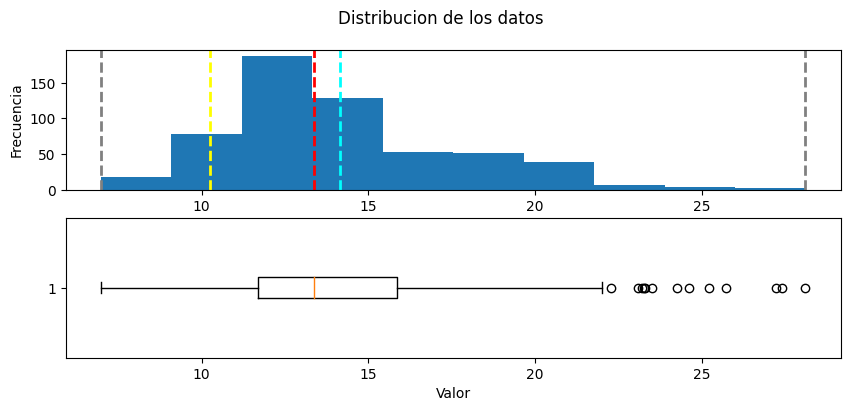

In [ ]:
show_distribution(df_cancer["radius_mean"])

Minimum:43.79
Mean:91.97
Median:86.24
Mode:82.61
Maximum:188.50



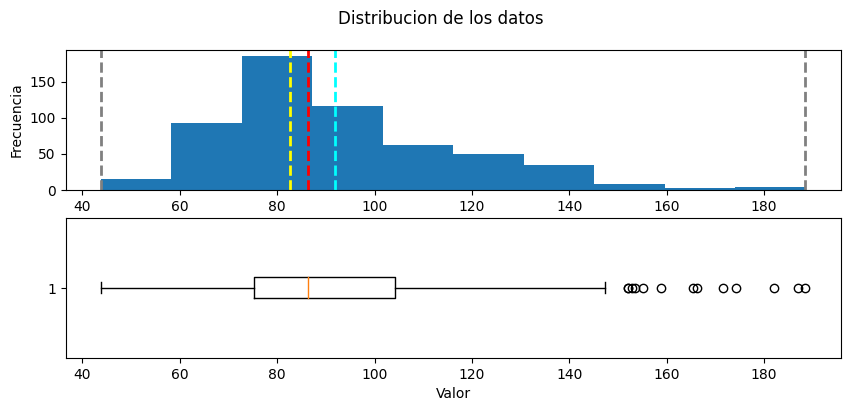

In [ ]:
show_distribution(df_cancer["perimeter_mean"])

Minimum:143.50
Mean:654.89
Median:551.10
Mode:512.20
Maximum:2501.00



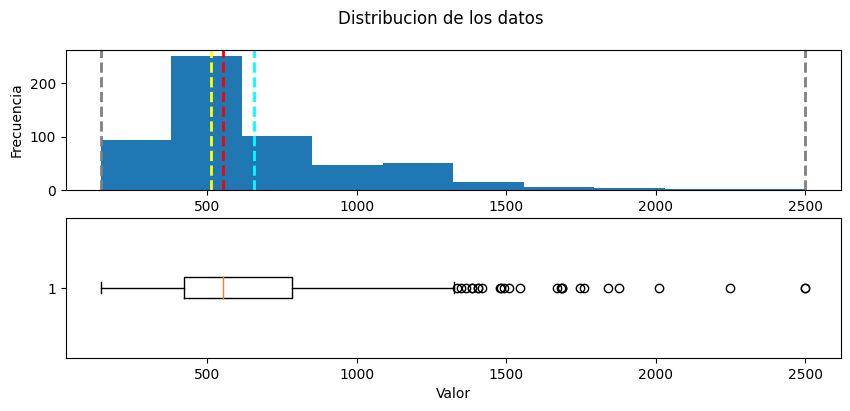

In [ ]:
show_distribution(df_cancer["area_mean"])

In [ ]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    var_data.plot.density()

    plt.title('Densidad de datos')

    # Muestra la media, la mediana y la moda
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    plt.show()



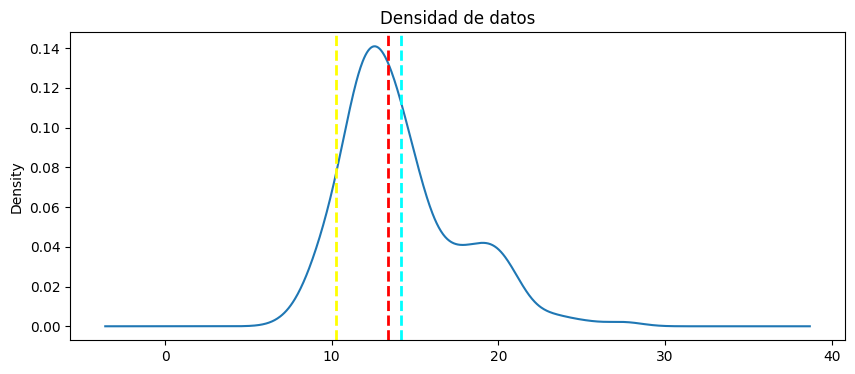

In [ ]:
show_density(df_cancer["radius_mean"])

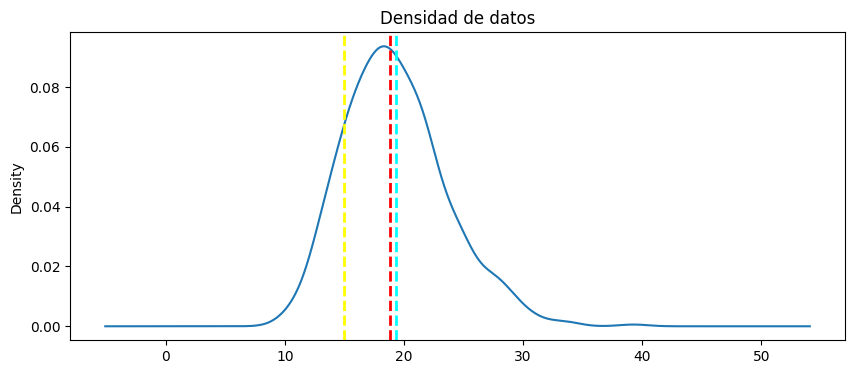

In [ ]:
show_density(df_cancer["texture_mean"])

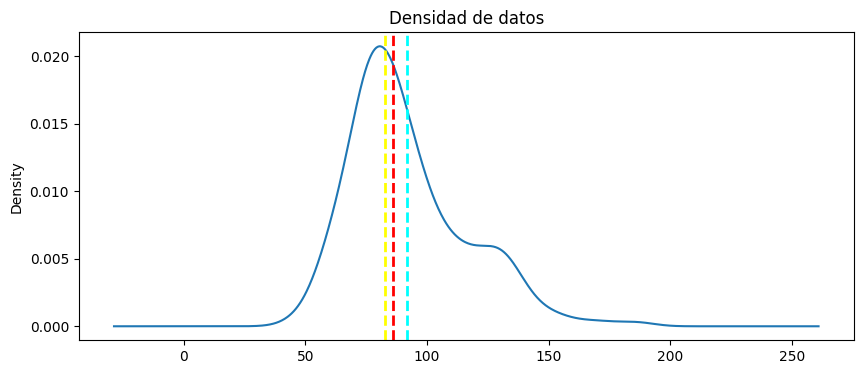

In [ ]:
show_density(df_cancer["perimeter_mean"])

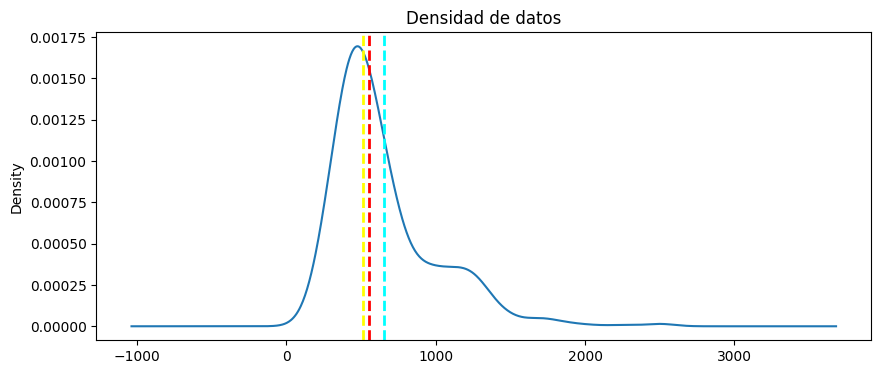

In [ ]:
show_density(df_cancer["area_mean"])

<Axes: title={'center': 'perimeter_mean'}, xlabel='diagnosis'>

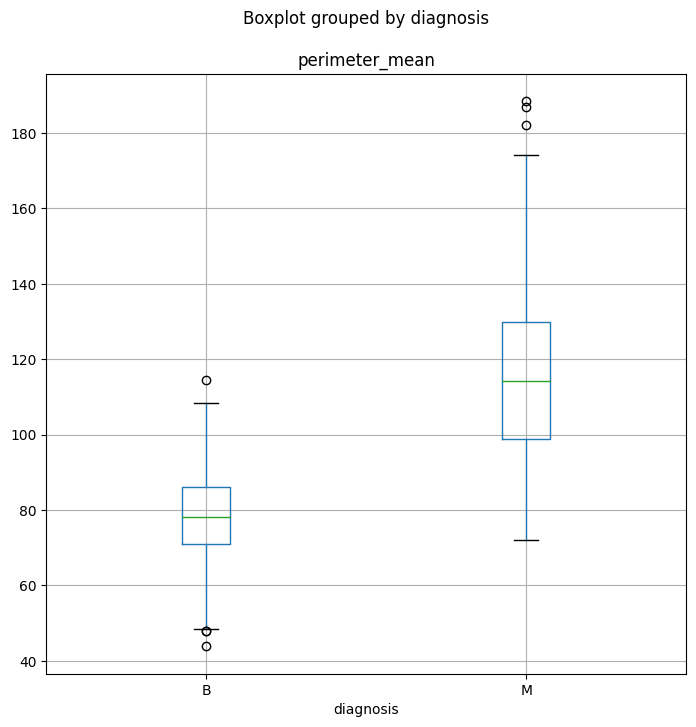

In [ ]:
df_cancer.boxplot(column="perimeter_mean",by="diagnosis", figsize=(8,8))

<Axes: title={'center': 'area_mean'}, xlabel='diagnosis'>

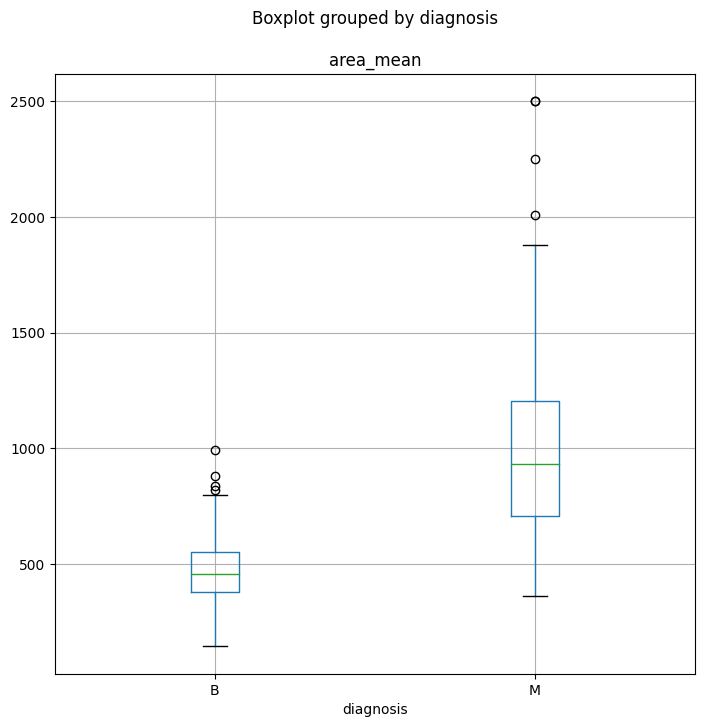

In [ ]:
df_cancer.boxplot(column="area_mean",by="diagnosis", figsize=(8,8))

<Axes: title={'center': 'radius_mean'}, xlabel='diagnosis'>

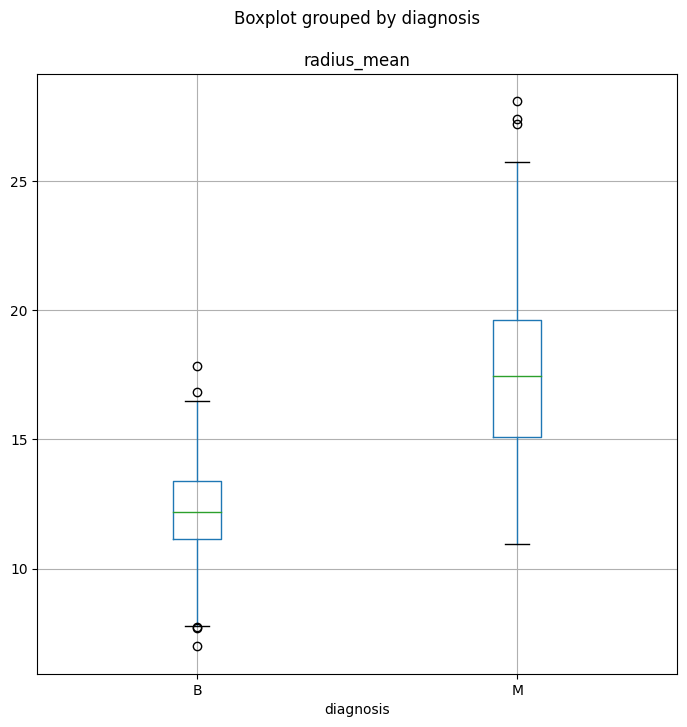

In [ ]:
df_cancer.boxplot(column="radius_mean",by="diagnosis", figsize=(8,8))

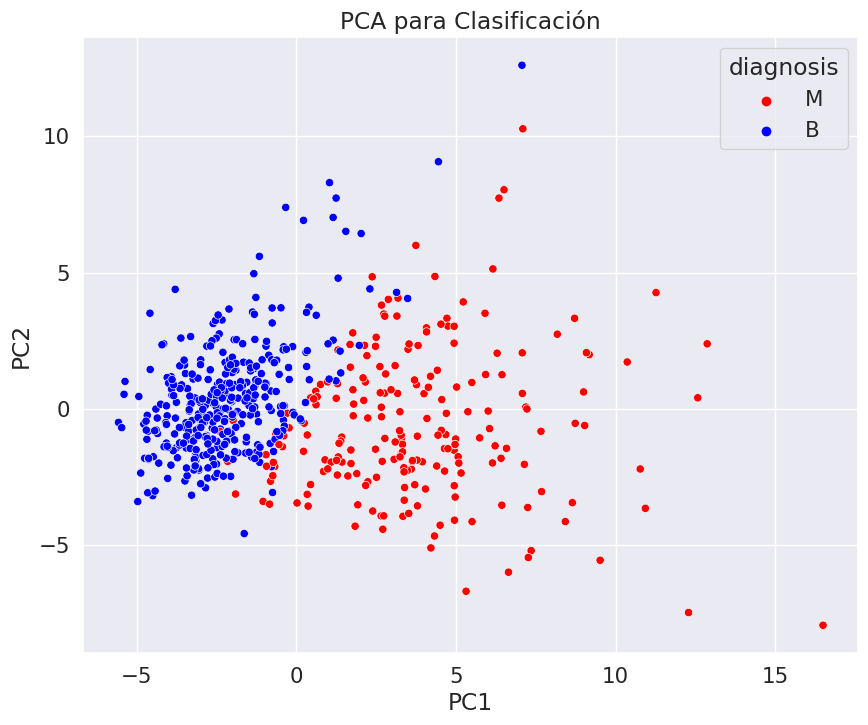

In [ ]:
features = df_cancer.drop(['diagnosis'], axis=1)
labels = df_cancer['diagnosis']

# Estandariza las características (importante para PCA)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Realiza PCA para reducir la dimensión a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Crea un nuevo DataFrame con los componentes principales y las etiquetas
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = labels

# Visualiza el PCA coloreando los puntos por las etiquetas
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='diagnosis', palette={'M': 'red', 'B': 'blue'})
plt.title('PCA para Clasificación')
plt.show()

In [ ]:
val_etiquetas = df_cancer['diagnosis'].value_counts()
print(val_etiquetas)

B    357
M    212
Name: diagnosis, dtype: int64


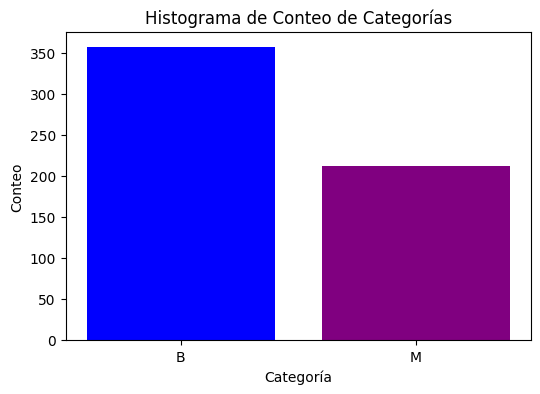

In [ ]:
count_df = pd.DataFrame(val_etiquetas)
count_df.columns = ['Conteo']

# Crea el histograma
plt.figure(figsize=(6, 4))
plt.bar(count_df.index, count_df['Conteo'], color=["blue","purple"])
plt.title('Histograma de Conteo de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.xticks(count_df.index, count_df.index)  # Etiquetas en el eje x
plt.show()

**3. Probar con 2 algoritmos:
Regresión: lineal/multiple/logística y Clasificador**

Para el proposito de los algoritmos, se trabaja solo con las caracteristicas de valores promedios

In [ ]:
cancer_filtrado = df_cancer.columns[df_cancer.columns.str.endswith('mean') | (df_cancer.columns == 'diagnosis')]
df_nuevo_cancer = df_cancer[cancer_filtrado]
df_nuevo_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
val_etiquetas_new = df_nuevo_cancer['diagnosis'].value_counts()
print(val_etiquetas_new)

B    357
M    212
Name: diagnosis, dtype: int64


In [ ]:
df_B = df_nuevo_cancer[df_nuevo_cancer['diagnosis'] == 'B']
df_M = df_nuevo_cancer[df_nuevo_cancer['diagnosis'] == 'M']
print(df_B)
print(df_M)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19          B       13.540         14.36           87.46      566.3   
20          B       13.080         15.71           85.63      520.0   
21          B        9.504         12.44           60.34      273.9   
37          B       13.030         18.42           82.61      523.8   
46          B        8.196         16.84           51.71      201.9   
..        ...          ...           ...             ...        ...   
558         B       14.590         22.68           96.39      657.1   
559         B       11.510         23.93           74.52      403.5   
560         B       14.050         27.15           91.38      600.4   
561         B       11.200         29.37           70.67      386.0   
568         B        7.760         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
19           0.09779           0.08129         0.06664             0

In [ ]:
df_B_sampled = df_B.sample(n=212, random_state=42)
df_M_sampled = df_M.sample(n=212, random_state=42)

In [ ]:
df_balanceado_cancer = pd.concat([df_B_sampled, df_M_sampled])
print(df_balanceado_cancer['diagnosis'].value_counts())

B    212
M    212
Name: diagnosis, dtype: int64


Particionar el data frame en test: 30% y train: 70%

In [ ]:
etiquetas = df_balanceado_cancer['diagnosis']
caracteristicas = df_balanceado_cancer.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, etiquetas, test_size=0.3, random_state=42,shuffle = True, stratify=etiquetas)

Regresion Logistica

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Clasificador: Knn

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

**4. Calcular la matriz de confusión con su respectiva interpretación.**

Para Regresion Logistica

De la clase M (Maligno) predijo correctamente 55 instancias o casos, mientras que 9 dijo que eran Benignas (B) pero eran malignas. De la misma manera predijo correctamente 57 instancias que eran de la clase B (Benignas), mientras que 7 instancias eran Benignas pero las predijo como malignas

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[55  9]
 [ 7 57]]


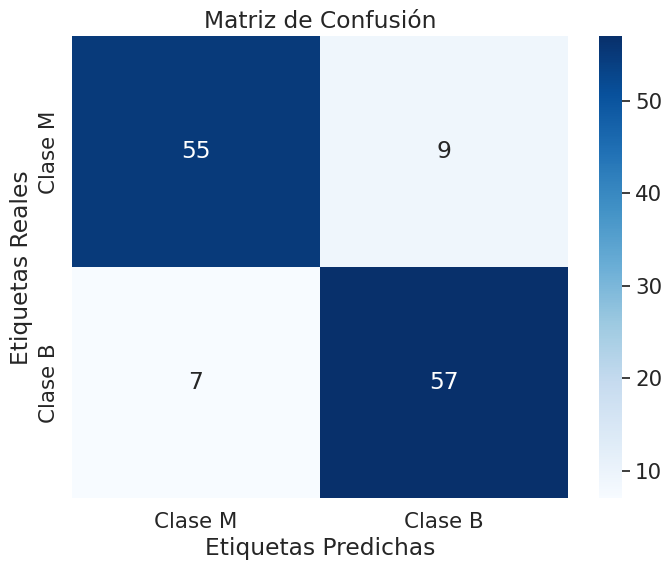

In [ ]:
class_names = ['Clase M', 'Clase B']
atypical angina
# Crear un mapa de calor (heatmap) para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Ajusta el tamaño de fuente
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')
plt.show()

Para KNN

De la clase M (Maligno) predijo correctamente 55 instancias o casos, mientras que 9 dijo que eran Benignas (B) pero eran malignas. De la misma manera predijo correctamente 53 instancias que eran de la clase B (Benignas), mientras que 11 instancias eran Benignas pero las predijo como malignas

In [ ]:
confusion_k = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusión:")
print(confusion_k)

Matriz de Confusión:
[[55  9]
 [11 53]]


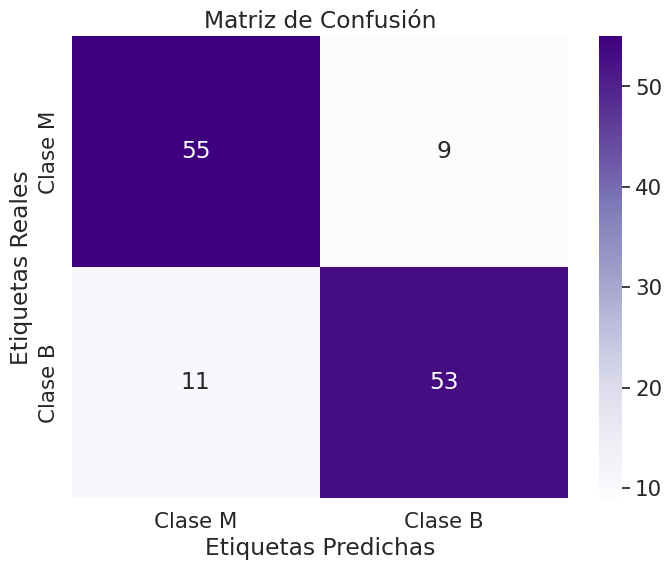

In [ ]:
class_names = ['Clase M', 'Clase B']

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_k, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')
plt.show()

**5. Calcular las métricas de desempeño adecuadas para la naturaleza del dataset**

Para Regresion Logistica

In [ ]:
reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           B       0.89      0.86      0.87        64
           M       0.86      0.89      0.88        64

    accuracy                           0.88       128
   macro avg       0.88      0.88      0.87       128
weighted avg       0.88      0.88      0.87       128



Para KNN

In [ ]:
reporte_k = classification_report(y_test, y_pred_knn)
print(reporte_k)

              precision    recall  f1-score   support

           B       0.83      0.86      0.85        64
           M       0.85      0.83      0.84        64

    accuracy                           0.84       128
   macro avg       0.84      0.84      0.84       128
weighted avg       0.84      0.84      0.84       128



**6. Conclusiones**


Finalmente, el algoritmo de regresion logistica tuvo un mejor desempeño en comparacion con el clasificador knn, en este caso, ambos algoritmos se usaron para clasificar si una mujer puede tener un tumor cancerigeno Benigno (B) o Maligno (M) dentro del cancer de mama de acuerdo al promedio de los valores de las caracteristicas como el radio, textura, area, perimetro, concavidad, etc. Se hizo la limpieza de la informacion que es importante para los algoritmos, ya que tienen problemas cuando existen valores faltantes